# Solving Gomoku With a Small Budget

## DDPG + Heuristics + Policy-advised Minimax Treesearch

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from domoku import data
from domoku.ddpg import Trainer, DdpgPlayer
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.policies.maximal_criticality import MaxCriticalityPolicy
from domoku.tools import GomokuTools as gt
from domoku.board import GomokuBoard

In [3]:
SIZE=15

In [8]:
hard_policy = MaxCriticalityPolicy(SIZE, overconfidence=2)

params = MaxInfluencePolicyParams(
    n=15,
    sigma=.7,
    iota=3,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
heuristics = MaxInfluencePolicy(params, criticality_model=hard_policy)
initial_state = data.create_nxnx4(size=SIZE, stones=[('H', 8)])
trainer = Trainer(heuristics)

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


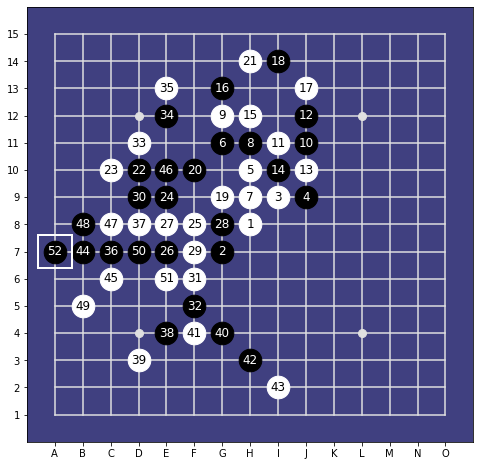

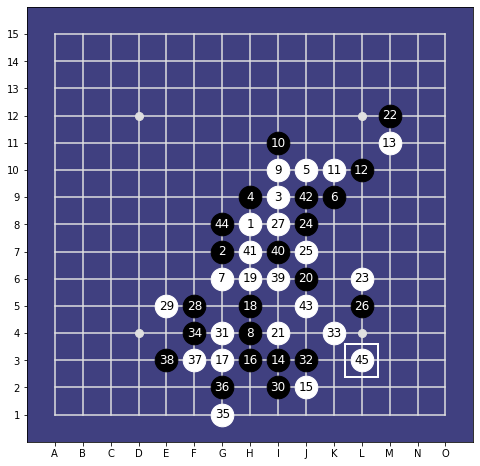

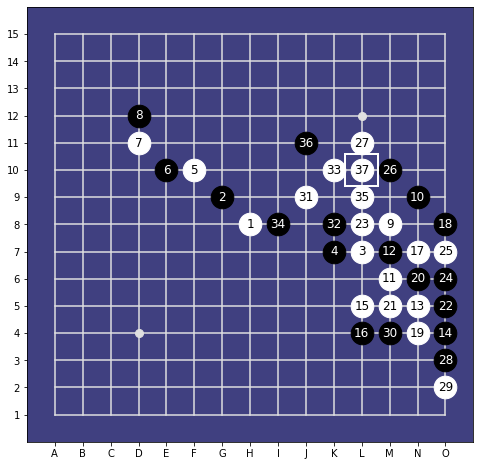

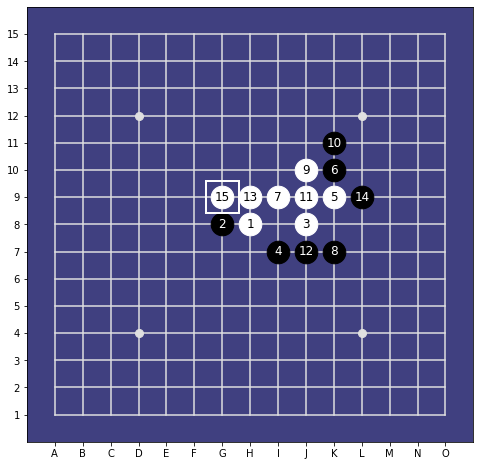

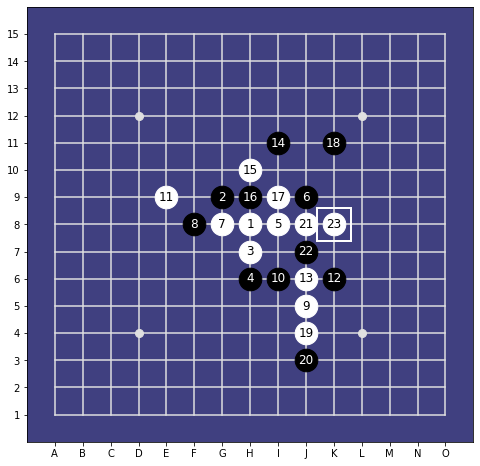

In [23]:
NUM_TRAJECTORIES = 10

player1 = DdpgPlayer(heuristics)
player2 = DdpgPlayer(heuristics)

trajectories = trainer.create_trajectories(player1=player1, player2=player2,
                                           num_trajectories=NUM_TRAJECTORIES, max_length=80,
                                           initial_state=initial_state, terminal=True)

for i in range(NUM_TRAJECTORIES):
    if trajectories[i] is not None:
        moves = [gt.m2b(t[0], SIZE) for  t in trajectories[i][1:]]
        board = GomokuBoard(SIZE, disp_width=8, stones=[('H', 8)] + moves)
        board.display()